# Assignment 3

## 1 Histogram Calculation

### Julia function `myhistogram`

In [1]:
#import Pkg; Pkg.add("Colors")

In [2]:
using Images, Colors

"""
myhistogram(img)
Takes the grayscale image `img` and returns its histogram.
# Arguments
- `img::Array{T,2}`: 2D array representing a grayscale image
in range [0, 1]
"""

function myhistogram(img) 
    if typeof(img) == Matrix{Gray{N0f8}}
        imgArray = channelview(float.(img))
        # vector of length 256
        histogram = zeros(Int64, 256)
        
        for pixel in eachindex(imgArray)
            quantisation = Int(imgArray[pixel]÷(1/256) +1)
            histogram[quantisation] +=1;
        end
    end
    return histogram./(size(imgArray,1) * size(imgArray,2))
end

myhistogram (generic function with 1 method)

### Loading images and calculate histogram for each image

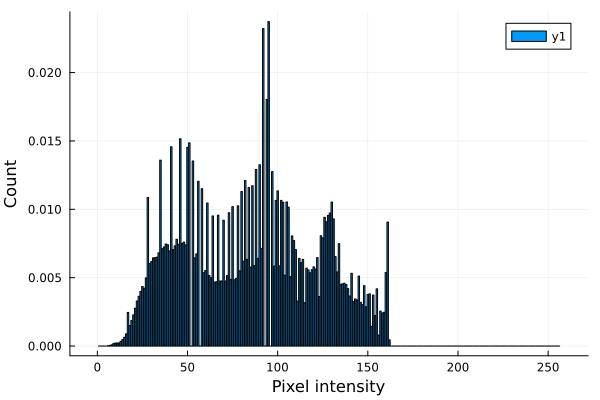

In [3]:
using FileIO
using Plots

bookstore = load("bookstore_dark.tif");


hist_bookstore = myhistogram(bookstore);
plot(hist_bookstore, seriestype=:bar, xlabel="Pixel intensity", ylabel="Count")

### Cumulative Histogram

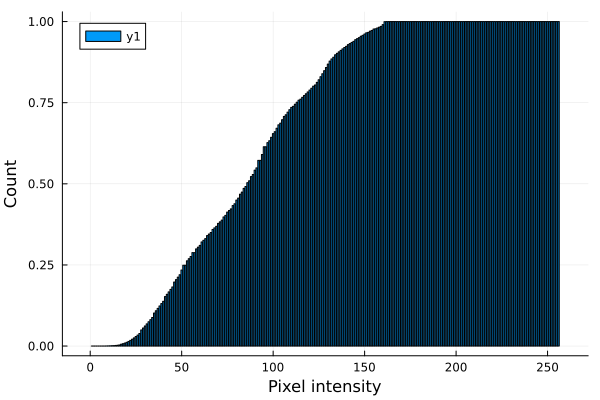

In [4]:
function cumulative_hist(hist)
    cum_hist = zeros(256)
    h =0
    for i in 1:256
        h = h + hist[i]
        cum_hist[i]=h
    end
    return cum_hist
end
cum_hist_bookstore= cumulative_hist(hist_bookstore)
plot(cum_hist_bookstore, seriestype=:bar, xlabel="Pixel intensity", ylabel="Count")

### Mapping and Image Equalisation

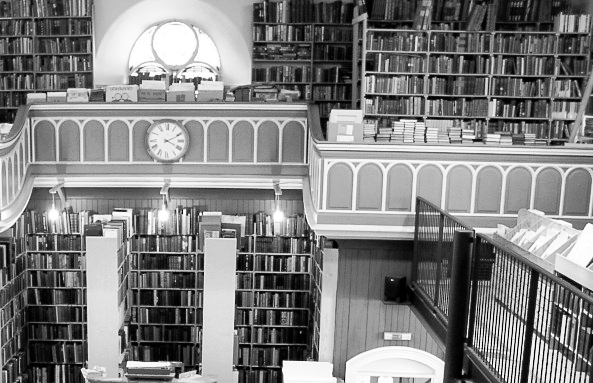

In [5]:
function mapping(k,cum_hist)
    quantisation = Int(k÷(1/256) +1)
    s_k=cum_hist[quantisation]
    result = round(s_k*255)
    return result
end
function equalize(img,cum_hist)
     if typeof(img) == Matrix{Gray{N0f8}}
        imgArray = channelview(float.(img))
        # vector of length 256
        imgArray_out =zeros(size(imgArray))
        
        for pixel in eachindex(imgArray)
            imgArray_out[pixel]=mapping(imgArray[pixel],cum_hist)
        end
        return imgArray_out./255
    end
end
imgArray_out=equalize(bookstore,cum_hist_bookstore)    
colorview(Gray, imgArray_out)